In [1]:
using Distributions
using StatsPlots

負の二項分布の確率函数は

$$
P(k) = \binom{k+r-1}{k} p^r (1 - p)^k \quad (k = 0,1,2,\ldots)
$$

であり, $k$ は成功確率 $p$ のBernoulli試行で初めて $r$ 回成功するまでの失敗する回数を意味している. 

これのパラメータを $r = \alpha$, $p = 1/(N\theta)$ とおくと, $N$ が大きいとき $k/N$ は近似的に分布 $\operatorname{Gamma}(\alpha, \theta)$ に従う.

In [2]:
function plot_scaled_negbin(; α = 3, θ = 5, N = 100)
    gamma = Gamma(α, θ)
    negbin = LocationScale(0, 1/N, NegativeBinomial(α, 1/(N*θ)))
    
    xmax = quantile(gamma, 0.995)
    plot(; legend=:bottomright)
    plot!(x -> cdf(negbin, x), 0, xmax; label="NegativeBinomial(r = α, p = 1/(Nθ)) scaled by 1/N")
    plot!(x -> cdf(gamma, x), 0, xmax; label="Gamma(α = $α, θ = $θ)", ls=:dash)
    title!("cdf of scaled NegativeBinomial distribution for N = $N"; titlefontsize=10)
end

plot_scaled_negbin (generic function with 1 method)

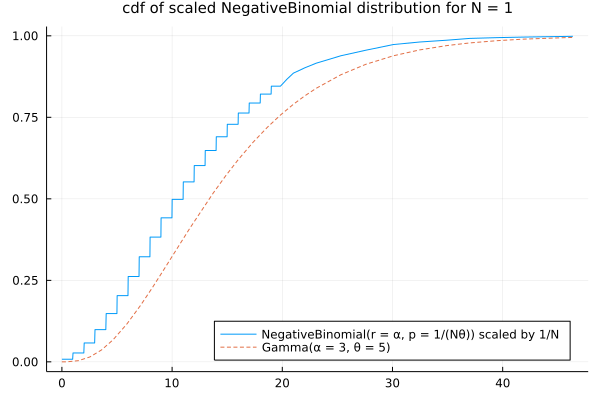

In [3]:
plot_scaled_negbin(N = 1)

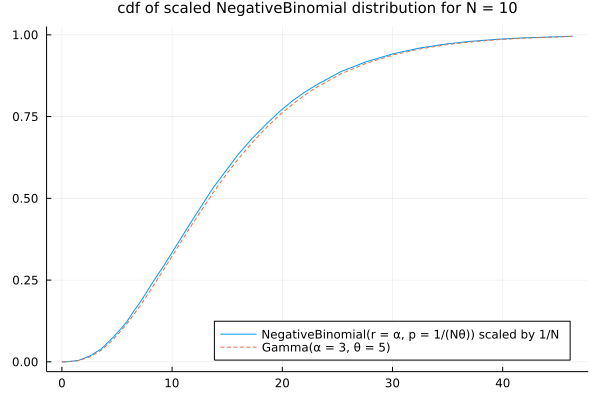

In [4]:
plot_scaled_negbin(N = 10)

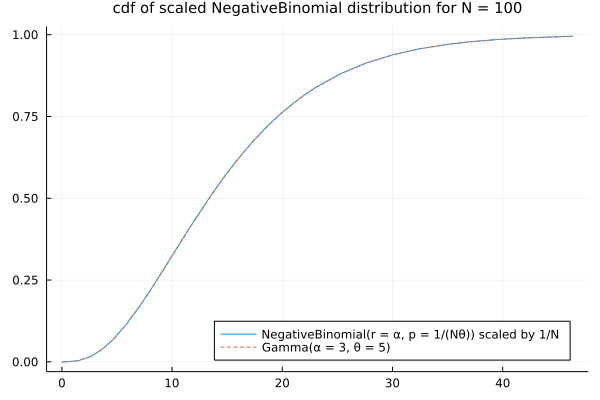

In [5]:
plot_scaled_negbin(N = 100)

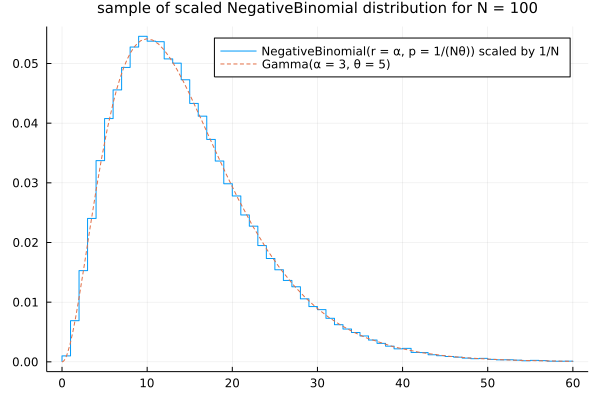

In [6]:
α = 3
θ = 5
N = 100
gamma = Gamma(α, θ)
negbin = LocationScale(0, 1/N, NegativeBinomial(α, 1/(N*θ)))
X = rand(negbin, 10^5)

xmax = 60
stephist(X; norm=true, bin=0:xmax, label="NegativeBinomial(r = α, p = 1/(Nθ)) scaled by 1/N")
plot!(gamma, 0, xmax; label="Gamma(α = $α, θ = $θ)", ls=:dash)
title!("sample of scaled NegativeBinomial distribution for N = $N"; titlefontsize=10)

二項分布の確率函数は

$$
P(k) = \binom{n}{k} p^k (1 - p)^{n-k} \quad (k = 0,1,\ldots,n)
$$

であり, $k$ は成功確率 $p$ の $n$ 回のBernoulli試行中の成功回数を意味している.

これのパラメータを $p = \lambda/n$ とおくと, $n$ が大きいとき $k$ は近似的に分布 $\operatorname{Poisson}(\lambda)$ に従う.

In [7]:
function plot_bin(; λ = 5, n = 100)
    poisson = Poisson(λ)
    bin(n) = Binomial(n, λ/n)
    
    xmax = quantile(poisson, 0.995)
    plot(; legend=:bottomright)
    plot!(x -> cdf(bin(n), x), 0, xmax; label="Binomial(n, p = λ/n)")
    plot!(x -> cdf(poisson, x), 0, xmax; label="Poisson(λ = $λ)", ls=:dash)
    title!("cdf of Binomial distribution for n = $n"; titlefontsize=10)
end

plot_bin (generic function with 1 method)

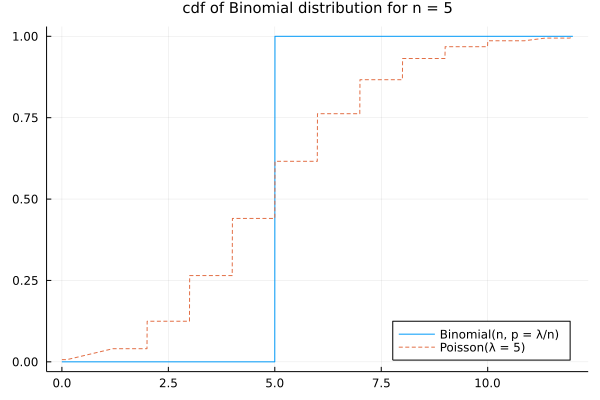

In [8]:
plot_bin(n = 5)

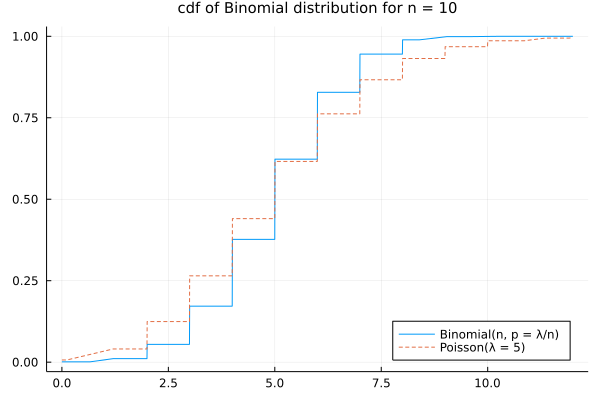

In [9]:
plot_bin(n = 10)

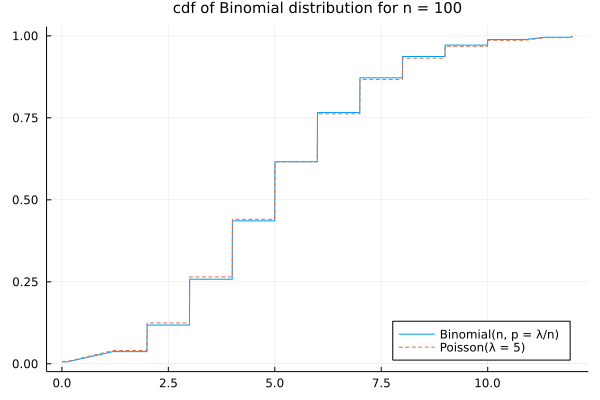

In [10]:
plot_bin(n = 100)